In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

## Relating variables with Scatter plots

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


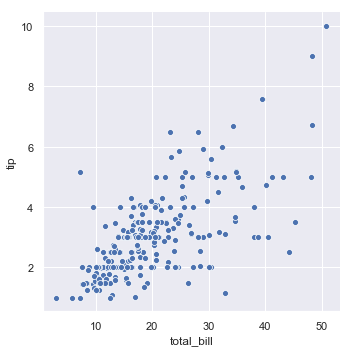

In [3]:
sns.relplot(x='total_bill', y='tip', data=tips)

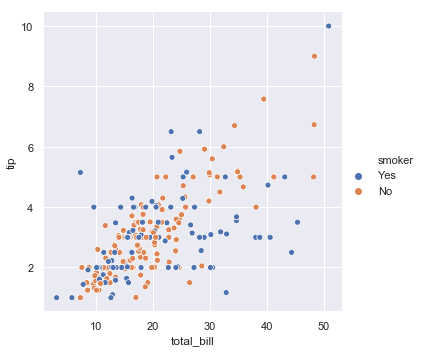

In [4]:
# adding new dimension with hue semantic
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

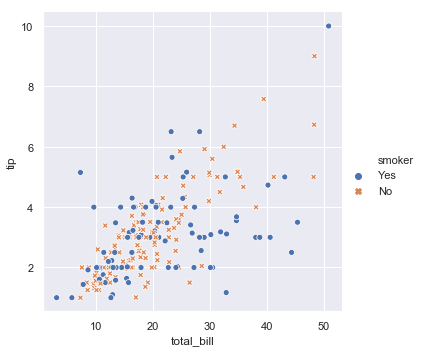

In [6]:
# using different marker style
sns.relplot(x='total_bill', y='tip', hue='smoker', style='smoker', data=tips)

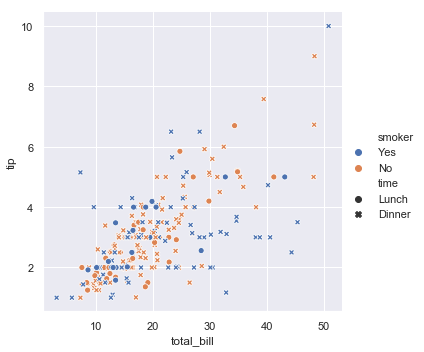

In [8]:
# It’s also possible to represent four variables by changing the hue and style of each point independently.

sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=tips)

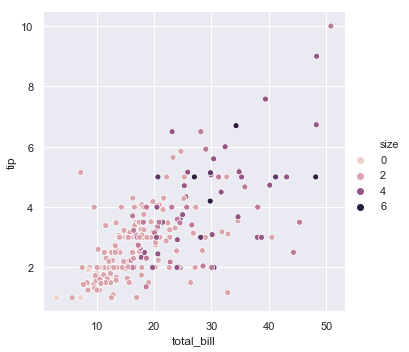

In [9]:
# plotting with numeric data for hue semantic
sns.relplot(x='total_bill', y='tip', hue='size', data=tips)

#### The default coloring switches to a sequential palette

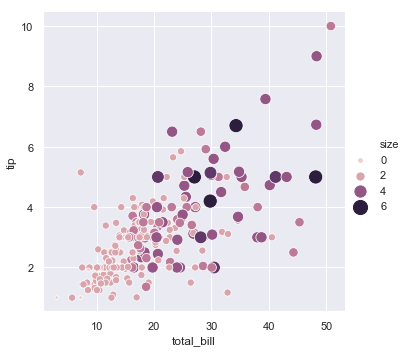

In [12]:
# Using size to change size of each point

sns.relplot(x='total_bill', y='tip', hue='size', size='size', sizes=(15, 200), data=tips)

## Emphasizing continuity with line plots

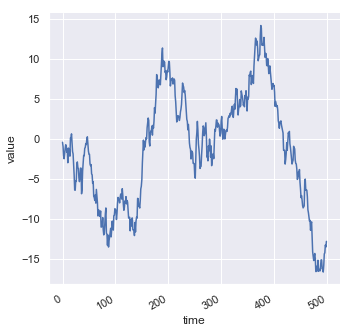

In [13]:
# creating dataFrame
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))

g = sns.relplot(x='time', y='value', kind='line', data=df)

# rotate dates on x axis
g.fig.autofmt_xdate()

### Aggregation and representing uncertainity

In [16]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


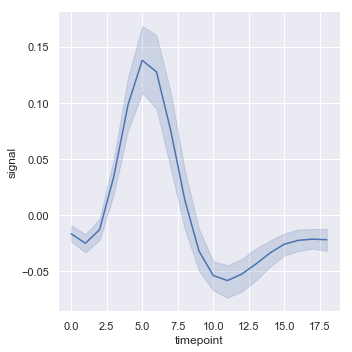

In [17]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri)
# default behaviour is plotting mean

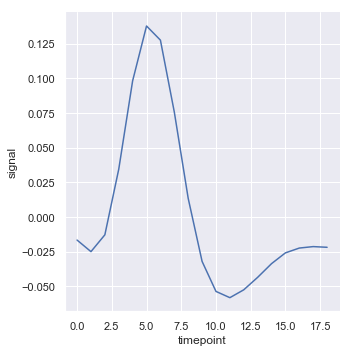

In [18]:
# setting confidence interval as None
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

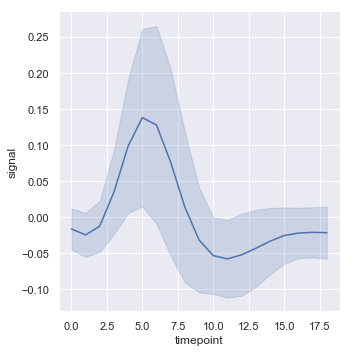

In [19]:
# ci='sd'
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

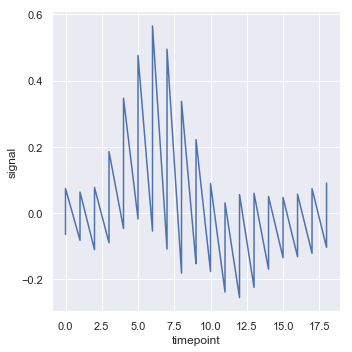

In [20]:
# to turn off the aggregation
sns.relplot(x='timepoint', y='signal', estimator=None, kind='line', data=fmri)

### Plotting subsets of data with semantic mappings

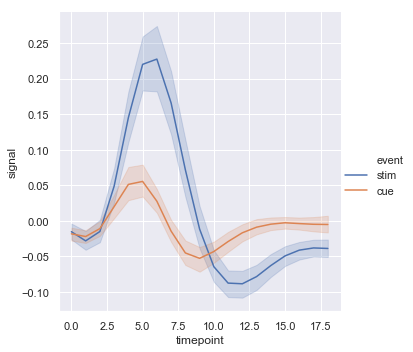

In [21]:
sns.relplot(x='timepoint', y='signal', hue='event', kind='line', data=fmri)

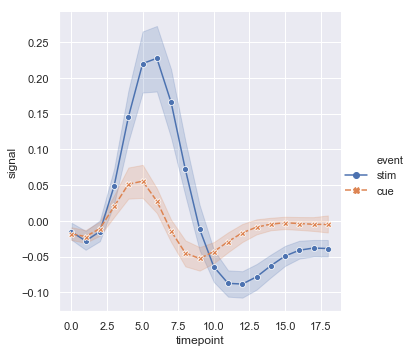

In [24]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event', markers=True, kind='line', data=fmri)

### Plotting with Date data

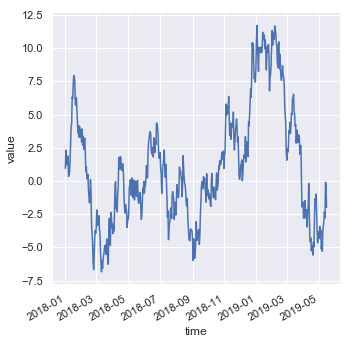

In [26]:
df = pd.DataFrame(dict(time=pd.date_range("2018-1-1", periods=500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate()

## Showing multiple relationships with facets

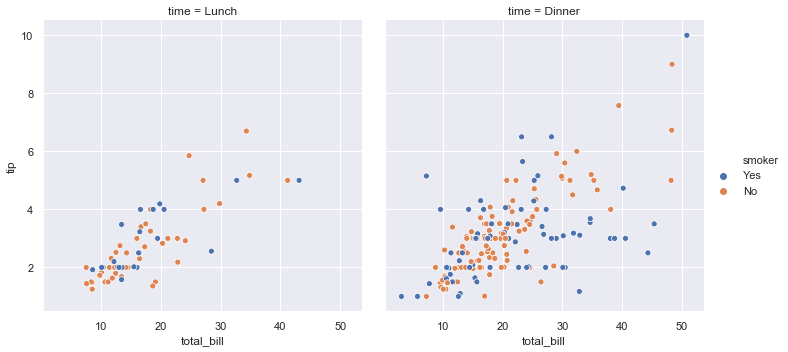

In [27]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

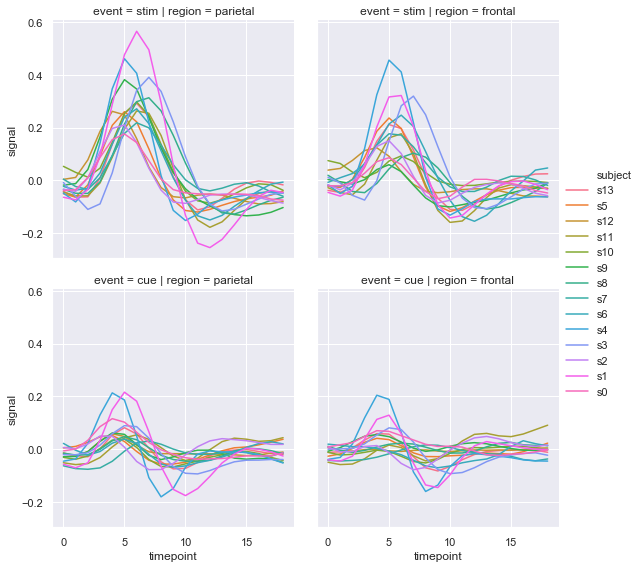

In [28]:
sns.relplot(x='timepoint', y='signal', hue='subject', 
            col='region', row='event', height=4, 
            kind='line', estimator=None, data=fmri)

- When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows

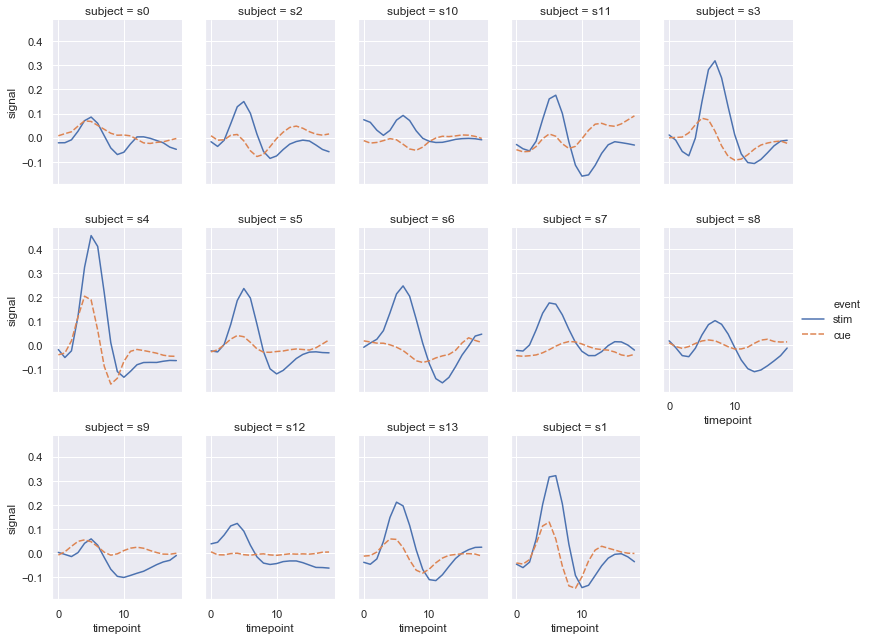

In [30]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event',
           col='subject', col_wrap=5, height=3, aspect=0.75,
           kind='line', data=fmri.query("region == 'frontal'"))